In [1]:
class Node:
    def __init__(self, key, priority, left=None, right=None):
        self.key = key
        self.priority = priority
        self.left = left
        self.right = right
    
    def __str__(self):
        return f'Node({self.key}, {self.priority})'
    
    def copy(self):
        return Node(self.key, self.priority, self.left, self.right)

In [2]:
testnodes = "(A : 5),(B : 3),(C : 8),(D : 2),(E : 6),(F : 7),(G : 9),(H : 1),(I : 10),(J : 12)"

In [3]:
def nodes_from_string(nodes_str):
    nodes = []
    for node_str in nodes_str.split(','):
        key, priority = node_str.strip('()').split(' : ')
        nodes.append(Node(key, int(priority)))
    return nodes

def print_nodes(nodes):
    for node in nodes:
        print(node)
        

import binarytree

In [4]:
nodes = nodes_from_string(testnodes)
print_nodes(nodes)

Node(A, 5)
Node(B, 3)
Node(C, 8)
Node(D, 2)
Node(E, 6)
Node(F, 7)
Node(G, 9)
Node(H, 1)
Node(I, 10)
Node(J, 12)


In [5]:
nodes

In [6]:
def copy_nodeslist(nodes):
    return [node.copy() for node in nodes]

In [7]:
nodes[4].key, nodes[4].priority

('E', 6)

In [8]:
def insert_node_without_rotation(root, node, verbose=False):
    if verbose:
        print(f"--ADDING {node.key} TO {root.key}--")
    if node.priority < root.priority:
        if node.key < root.key:
            node.right = root
            if verbose:
                print(f"Added node above root ({node.key}.right = {root.key})")
            return node
        else:
            node.left = root
            if verbose:
                print(f"Added node above root ({node.key}.left = {root.key})")
            return node
    if node.key < root.key:
        if root.left is None:
            root.left = node
            if verbose:
                print(f"Added node to left of root ({root.key}.left = {node.key})")
            return root
        if verbose:
            print(f"\tGoing one layer down on the left from {root.key} for {node.key}")
        root.left = insert_node_without_rotation(root.left, node, verbose=verbose)
        return root
    if root.right is None:
        root.right = node
        if verbose:
            print(f"Added node to right of root ({root.key}.right = {node.key})")
        return root
    if verbose:
        print(f"\tGoing one layer down on the right from {root.key} for {node.key}")
    root.right = insert_node_without_rotation(root.right, node, verbose=verbose)
    return root

def create_tree_without_rotation(nodes, verbose=False):
    root = nodes[0]
    for node in nodes[1:]:
        root = insert_node_without_rotation(root, node, verbose=verbose)
    return root

def convert_to_printable(root):
    if root is None:
        return None
    return binarytree.Node('(' + root.key + ', ' + str(root.priority) + ')', convert_to_printable(root.left), convert_to_printable(root.right))

In [9]:
def insert_node(root, node, verbose=False):
    if verbose:
        print(f"--ADDING {node.key} TO {root.key}--")
    if node.priority < root.priority:
        if node.key < root.key:
            node.right = root
            if verbose:
                print(f"Added node above root ({node.key}.right = {root.key})")
            if root.left and root.left.key < node.key:
                node.left = root.left
                root.left = None
                if verbose:
                    print("Fixed left child")
            return node
        else:
            node.left = root
            if verbose:
                print(f"Added node above root ({node.key}.left = {root.key})")
            if root.right and root.right.key > node.key:
                node.right = root.right
                root.right = None
                if verbose:
                    print("Fixed right child")
            return node
    if node.key < root.key:
        if root.left is None:
            root.left = node
            if verbose:
                print(f"Added node to left of root ({root.key}.left = {node.key})")
            return root
        if verbose:
            print(f"\tGoing one layer down on the left from {root.key} for {node.key}")
        root.left = insert_node(root.left, node, verbose=verbose)
        return root
    if root.right is None:
        root.right = node
        if verbose:
            print(f"Added node to right of root ({root.key}.right = {node.key})")
        return root
    if verbose:
        print(f"\tGoing one layer down on the right from {root.key} for {node.key}")
    root.right = insert_node(root.right, node, verbose=verbose)
    return root

def create_tree(nodes, verbose=False):
    root = nodes[0]
    for node in nodes[1:]:
        root = insert_node(root, node, verbose=verbose)
    return root

def convert_to_printable(root):
    if root is None:
        return None
    return binarytree.Node('(' + root.key + ', ' + str(root.priority) + ')', convert_to_printable(root.left), convert_to_printable(root.right))

In [10]:
nodes = nodes_from_string(testnodes)
#print_nodes(nodes)
root = create_tree_without_rotation(nodes)

print(convert_to_printable(root))


                         ________________________(H, 1)___
                        /                                 \
           __________(D, 2)__                           (I, 10)___
          /                  \                                    \
    ___(B, 3)__             (E, 6)__                            (J, 12)
   /           \                    \
(A, 5)        (C, 8)               (F, 7)__
                                           \
                                          (G, 9)



In [11]:
# new order:   H,      D,      B,      A,      E,      F,      C,      G,      I et     J
testnodes2 = "(H : 1),(D : 2),(B : 3),(A : 5),(E : 6),(F : 7),(C : 8),(G : 9),(I : 10),(J : 12)"
nodes2 = nodes_from_string(testnodes2)

In [12]:
nodes2 = nodes_from_string(testnodes2)
#print_nodes(nodes)
root2 = create_tree_without_rotation(nodes2)

print(convert_to_printable(root2))


                         ________________________(H, 1)___
                        /                                 \
           __________(D, 2)__                           (I, 10)___
          /                  \                                    \
    ___(B, 3)__             (E, 6)__                            (J, 12)
   /           \                    \
(A, 5)        (C, 8)               (F, 7)__
                                           \
                                          (G, 9)



In [13]:
root3 = insert_node_without_rotation(root2, Node('M', 20))
print(convert_to_printable(root3))
root3 = insert_node_without_rotation(root3, Node('K', 15))
print(convert_to_printable(root3))
root3 = insert_node_without_rotation(root3, Node('L', 14))
print(convert_to_printable(root3))


                         ________________________(H, 1)___
                        /                                 \
           __________(D, 2)__                           (I, 10)___
          /                  \                                    \
    ___(B, 3)__             (E, 6)__                            (J, 12)___
   /           \                    \                                     \
(A, 5)        (C, 8)               (F, 7)__                             (M, 20)
                                           \
                                          (G, 9)


                         ________________________(H, 1)___
                        /                                 \
           __________(D, 2)__                           (I, 10)___
          /                  \                                    \
    ___(B, 3)__             (E, 6)__                            (J, 12)___
   /           \                    \                                     \
(A, 5)       

In [14]:
root3 = insert_node(root2, Node('M', 20))
print(convert_to_printable(root3))
root3 = insert_node(root3, Node('K', 15))
print(convert_to_printable(root3))
root3 = insert_node(root3, Node('L', 14))
print(convert_to_printable(root3))


                         ________________________(H, 1)___
                        /                                 \
           __________(D, 2)__                           (I, 10)___
          /                  \                                    \
    ___(B, 3)__             (E, 6)__                            (J, 12)___________________
   /           \                    \                                                     \
(A, 5)        (C, 8)               (F, 7)__                                  ___________(L, 14)___
                                           \                                /                     \
                                          (G, 9)                        (K, 15)___              (M, 20)
                                                                                  \
                                                                                (M, 20)


                         ________________________(H, 1)___
                        / 

In [15]:
nodes = nodes_from_string(testnodes)
root = nodes[0]
print(root, nodes[1])

Node(A, 5) Node(B, 3)


In [16]:
root = insert_node(root, nodes[1])
print(convert_to_printable(root))


    ___(B, 3)
   /
(A, 5)



In [17]:
root = insert_node(root, nodes[2])
print(convert_to_printable(root))


    ___(B, 3)__
   /           \
(A, 5)        (C, 8)



In [18]:
root = insert_node(root, nodes[3])
print(convert_to_printable(root))


           __________(D, 2)
          /
    ___(B, 3)__
   /           \
(A, 5)        (C, 8)



In [19]:
root = insert_node(root, nodes[4])
print(convert_to_printable(root))


           __________(D, 2)__
          /                  \
    ___(B, 3)__             (E, 6)
   /           \
(A, 5)        (C, 8)



In [20]:
root = insert_node(root, nodes[5])
print(convert_to_printable(root))


           __________(D, 2)__
          /                  \
    ___(B, 3)__             (E, 6)__
   /           \                    \
(A, 5)        (C, 8)               (F, 7)



In [21]:
root = insert_node(root, nodes[6])
print(convert_to_printable(root))


           __________(D, 2)__
          /                  \
    ___(B, 3)__             (E, 6)__
   /           \                    \
(A, 5)        (C, 8)               (F, 7)__
                                           \
                                          (G, 9)



In [22]:
root = insert_node(root, nodes[7])
print(convert_to_printable(root))


                         ________________________(H, 1)
                        /
           __________(D, 2)__
          /                  \
    ___(B, 3)__             (E, 6)__
   /           \                    \
(A, 5)        (C, 8)               (F, 7)__
                                           \
                                          (G, 9)



In [23]:
root = insert_node(root, nodes[8])
print(convert_to_printable(root))


                         ________________________(H, 1)___
                        /                                 \
           __________(D, 2)__                           (I, 10)
          /                  \
    ___(B, 3)__             (E, 6)__
   /           \                    \
(A, 5)        (C, 8)               (F, 7)__
                                           \
                                          (G, 9)



In [24]:
root = insert_node(root, nodes[9])
print(convert_to_printable(root))


                         ________________________(H, 1)___
                        /                                 \
           __________(D, 2)__                           (I, 10)___
          /                  \                                    \
    ___(B, 3)__             (E, 6)__                            (J, 12)
   /           \                    \
(A, 5)        (C, 8)               (F, 7)__
                                           \
                                          (G, 9)



In [25]:
nodes = nodes_from_string(testnodes)
print_nodes(nodes)
root = create_tree(nodes)

Node(A, 5)
Node(B, 3)
Node(C, 8)
Node(D, 2)
Node(E, 6)
Node(F, 7)
Node(G, 9)
Node(H, 1)
Node(I, 10)
Node(J, 12)


In [26]:
print(convert_to_printable(root))


                         ________________________(H, 1)___
                        /                                 \
           __________(D, 2)__                           (I, 10)___
          /                  \                                    \
    ___(B, 3)__             (E, 6)__                            (J, 12)
   /           \                    \
(A, 5)        (C, 8)               (F, 7)__
                                           \
                                          (G, 9)



In [27]:
# new order:   H,      D,      B,      A,      E,      F,      C,      G,      I et     J
testnodes2 = "(H : 1),(D : 2),(B : 3),(A : 5),(E : 6),(F : 7),(C : 8),(G : 9),(I : 10),(J : 12)"
nodes2 = nodes_from_string(testnodes2)

In [28]:
root2 = create_tree(nodes2)
print(convert_to_printable(root2))


                         ________________________(H, 1)___
                        /                                 \
           __________(D, 2)__                           (I, 10)___
          /                  \                                    \
    ___(B, 3)__             (E, 6)__                            (J, 12)
   /           \                    \
(A, 5)        (C, 8)               (F, 7)__
                                           \
                                          (G, 9)



In [29]:
def find_node(root, key):
    if root is None:
        return None
    if root.key == key:
        return root
    if key < root.key:
        return find_node(root.left, key)
    return find_node(root.right, key)

In [30]:
search = "E"
found_node = find_node(root2, search)
print(found_node, "==", search, found_node.key == search)   

Node(E, 6) == E True


In [31]:
examplenodes = "(F : 1),(H : 2),(B : 3),(A : 10),(E : 6),(C : 7),(J : 8),(G : 9),(I : 5),(D : 4)"
nodes3 = nodes_from_string(examplenodes)
root3 = create_tree(nodes3)
print(convert_to_printable(root3))


            ________________________(F, 1)_________
           /                                       \
     ___(B, 3)_________                        ___(H, 2)__
    /                  \                      /           \
(A, 10)            ___(D, 4)__             (G, 9)        (I, 5)__
                  /           \                                  \
               (C, 7)        (E, 6)                             (J, 8)



In [32]:
examplenodes = "(F : 1),(H : 2),(B : 3),(A : 10),(E : 6),(C : 7),(J : 8),(G : 9),(I : 5),(D : 4)"
nodes3 = nodes_from_string(examplenodes)

root3 = nodes3[0]

for i in range(1, len(nodes3)):
    root3 = insert_node(root3, nodes3[i])
    print(convert_to_printable(root3))


(F, 1)__
        \
       (H, 2)


    ___(F, 1)__
   /           \
(B, 3)        (H, 2)


            ___(F, 1)__
           /           \
     ___(B, 3)        (H, 2)
    /
(A, 10)


            __________(F, 1)__
           /                  \
     ___(B, 3)__             (H, 2)
    /           \
(A, 10)        (E, 6)


            _________________(F, 1)__
           /                         \
     ___(B, 3)_________             (H, 2)
    /                  \
(A, 10)            ___(E, 6)
                  /
               (C, 7)


            _________________(F, 1)__
           /                         \
     ___(B, 3)_________             (H, 2)__
    /                  \                    \
(A, 10)            ___(E, 6)               (J, 8)
                  /
               (C, 7)


            _________________(F, 1)_________
           /                                \
     ___(B, 3)_________                 ___(H, 2)__
    /                  \               /          

## Q 3.a Montrer, sur l’exemple de la question 1.a. que l’insertion d’un nœud dans un arbre cartésien en suivant la m´ethode d’insertion dans un arbre binaire de recherche, peut r´esulter en un arbre qui ne v´erifie plus la propri´et´e de tas

# A: insert_tree before the left and right child fixes

In [33]:
def rotate_tree_right(root):
    new_root = root.left
    root.left = new_root.right
    new_root.right = root
    return new_root

def rotate_tree_left(root):
    new_root = root.right
    root.right = new_root.left
    new_root.left = root
    return new_root

In [34]:
print(convert_to_printable(rotate_tree_right(root3)))


     ___(B, 3)_______________________
    /                                \
(A, 10)                   __________(F, 1)_________
                         /                         \
                   ___(D, 4)__                 ___(H, 2)__
                  /           \               /           \
               (C, 7)        (E, 6)        (G, 9)        (I, 5)__
                                                                 \
                                                                (J, 8)



# Complexity of rotation is O(1)  ?

---

# 3.D TESTS

---

In [35]:
nodes3d1 = nodes_from_string("(A : 5),(B : 3),(C : 8),(D : 2),(E : 6),(F : 7),(G : 9),(H : 1),(I : 10),(J : 12)")
nodes3d2 = nodes_from_string("(H : 1),(G : 9),(A : 5),(B : 3),(D : 2),(F : 7),(C : 8),(J : 12),(I : 10),(E : 6)")
nodes3d3 = nodes_from_string("(E : 6),(H : 1),(B : 3),(D : 2),(C : 8),(F : 7),(G : 9),(J : 12),(A : 5),(I : 10)")

print("\tTEST 1 (QUESTION 1.A)")
root1 = create_tree(nodes3d1, verbose=False)
print(convert_to_printable(root1))

print("\tTEST 2")
print(convert_to_printable(create_tree(nodes3d2, verbose=False)))

print("\tTEST 3")
print(convert_to_printable(create_tree(nodes3d3, verbose=False)))

	TEST 1 (QUESTION 1.A)

                         ________________________(H, 1)___
                        /                                 \
           __________(D, 2)__                           (I, 10)___
          /                  \                                    \
    ___(B, 3)__             (E, 6)__                            (J, 12)
   /           \                    \
(A, 5)        (C, 8)               (F, 7)__
                                           \
                                          (G, 9)

	TEST 2

                         ________________________(H, 1)___
                        /                                 \
           __________(D, 2)__                           (I, 10)___
          /                  \                                    \
    ___(B, 3)__             (E, 6)__                            (J, 12)
   /           \                    \
(A, 5)        (C, 8)               (F, 7)__
                                           \
           

---

# EX 4

---

In [36]:
def remove_node(root, node):
    if root is None:
        return None
    if root.key == node.key:
        if root.left is None:
            return root.right
        if root.right is None:
            return root.left
        if root.left.priority < root.right.priority:
            return rotate_tree_right(root)
        return rotate_tree_left(root)
    if node.key < root.key:
        root.left = remove_node(root.left, node)
        return root
    root.right = remove_node(root.right, node)
    return root

def remove_key(root, key):
    return remove_node(root, find_node(root, key))

In [37]:
def remove_node(root, node):
    if root is None:
        return None
    # Search for the node to remove
    if node.key < root.key:
        root.left = remove_node(root.left, node)
        return root
    if node.key > root.key:
        root.right = remove_node(root.right, node)
        return root
    # Case 1: Node is a leaf
    if root.left is None and root.right is None:
        return None
    # Case 2: Node has one child
    elif root.left is None:
        # Case 2.1: Node has a right child
        return root.right
    elif root.right is None:
        # Case 2.2: Node has a left child
        return root.left
    # Case 3: Node has two children
    # Rotate with the child that has the lowest priority
    if root.left.priority < root.right.priority:
        root = rotate_tree_right(root)
        root.right = remove_node(root.right, node)
    else:
        root = rotate_tree_left(root)
        root.left = remove_node(root.left, node)
    
    return root

def remove_key(root, key):
    return remove_node(root, find_node(root, key))

# 4.D - TESTS

In [38]:
print("\tSTARTING TREE\n")
print(convert_to_printable(root1))

print("\tTEST 1 (remove A5)\n")
A_removed = remove_key(root1, "A")
print(convert_to_printable(A_removed))

print("\tTEST 2 (remove J12)\n")
J_removed = remove_key(root1, "J")
print(convert_to_printable(J_removed))

print("\tTEST 3 (remove H1)\n")
H_removed = remove_key(root1, "H")
print(convert_to_printable(H_removed))

	STARTING TREE


                         ________________________(H, 1)___
                        /                                 \
           __________(D, 2)__                           (I, 10)___
          /                  \                                    \
    ___(B, 3)__             (E, 6)__                            (J, 12)
   /           \                    \
(A, 5)        (C, 8)               (F, 7)__
                                           \
                                          (G, 9)

	TEST 1 (remove A5)


                  ________________________(H, 1)___
                 /                                 \
    __________(D, 2)__                           (I, 10)___
   /                  \                                    \
(B, 3)__             (E, 6)__                            (J, 12)
        \                    \
       (C, 8)               (F, 7)__
                                    \
                                   (G, 9)

	TEST 2 (remove J1

---

# 5 - RANDOM TREE

---

In [39]:
def get_depth(root):
    if root is None:
        return 0
    return 1 + max(get_depth(root.left), get_depth(root.right))

def get_depth_of_node(root, node):
    if root is None:
        return 0
    if root.key == node.key:
        return 1
    if node.key < root.key:
        return 1 + get_depth_of_node(root.left, node)
    return 1 + get_depth_of_node(root.right, node)

In [40]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt

ALPHABET = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

def create_random_tree(n):
    key_size = len(str(n)) + 1
    priority_range = (1, n*10)
    nodes = []
    for i in range(n):
        key = ''.join(random.choices(ALPHABET, k=key_size))
        priority = random.randint(*priority_range)
        nodes.append(Node(key, priority))
    return create_tree(nodes)

def create_random_node(n):
    key_size = len(str(n)) + 1
    priority_range = (1, n*10)
    key = ''.join(random.choices(ALPHABET, k=key_size))
    priority = random.randint(*priority_range)
    return Node(key, priority)
    
print(convert_to_printable(create_random_tree(9)))


              _________________________________________________(SV, 27)___
             /                                                            \
     ____(GX, 33)____________                                           (YH, 43)
    /                        \
(AM, 51)               ____(IZ, 62)___
                      /               \
                  (IW, 90)          (JE, 63)___
                                               \
                                             (MC, 71)___
                                                        \
                                                      (RH, 81)



In [41]:
n = 100
test_count = 200000
times = [[] for _ in range(n)]
for i in range(test_count):
    root = create_random_tree(n)
    random_insert = create_random_node(n)
    start = time.time()
    insert_node(root, random_insert)
    end = time.time()
    depth = get_depth_of_node(root, random_insert)
    times[depth].append((end - start) * 1000)

depth_record_count = [len(t) for t in times[4:]]
average_times = [np.mean(time) for time in times[1:depth_record_count.index(0)-4]]

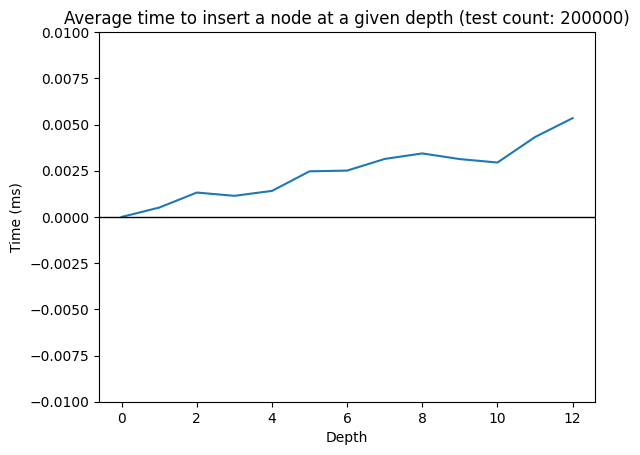

In [42]:
plt.plot(average_times)
plt.axhline(0, color='black', lw=1)
plt.title(f"Average time to insert a node at a given depth (test count: {test_count})")
plt.xlabel("Depth")
plt.ylim(-0.01, max(0.01, max(average_times)*1.1))
plt.ylabel("Time (ms)")
plt.show()

---

## Ensuring whole range of priorities to check higher depth values

---

In [43]:
def create_random_nodes_uniform(n, max_priority=-1):
    if max_priority == -1:
        max_priority = n * 10
    key_size = len(str(n)) + 1
    priorities = np.linspace(1, max_priority, n, dtype=int)
    nodes = []
    for i in range(n):
        key = ''.join(random.choices(ALPHABET, k=key_size))
        priority = priorities[i]
        nodes.append(Node(key, priority))
    return nodes

print(convert_to_printable(create_tree(create_random_nodes_uniform(9, 200))))


                                           ________________________(YN, 1)____
                                          /                                   \
                                  ____(JX, 25)____                         (ZC, 100)
                                 /                \
                         ____(HT, 50)          (PP, 150)____
                        /                                   \
                ____(FE, 75)                             (RJ, 200)
               /
      ____(BJ, 125)
     /
(AU, 175)



In [44]:
for node in create_random_nodes_uniform(10):
    print(node)

Node(KBO, 1)
Node(VZL, 12)
Node(NQP, 23)
Node(TGX, 34)
Node(PTB, 45)
Node(EBW, 56)
Node(ISQ, 67)
Node(NZV, 78)
Node(QNY, 89)
Node(ZHM, 100)


In [45]:
n = 200
test_count = 5000
repetition_count = 50
times = [[] for _ in range(n)]


random_inserts = create_random_nodes_uniform(test_count, n*10)

for i in range(test_count):
    for r in range(repetition_count):
        root = create_random_tree(np.linspace(1, n, repetition_count, dtype=int)[r])
        start = time.time()
        insert_node(root, random_inserts[i])
        end = time.time()
        depth = get_depth_of_node(root, random_insert)
        times[depth].append((end - start) * 1000)
        
average_times = [np.mean(time) for time in times[1:]]
# cut average_times at the first nan value
avgs = []
indexes = []
for i in range(len(average_times)):
    if not np.isnan(average_times[i]):
        avgs.append(average_times[i])
        indexes.append(i)

C:\Users\EGE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\EGE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


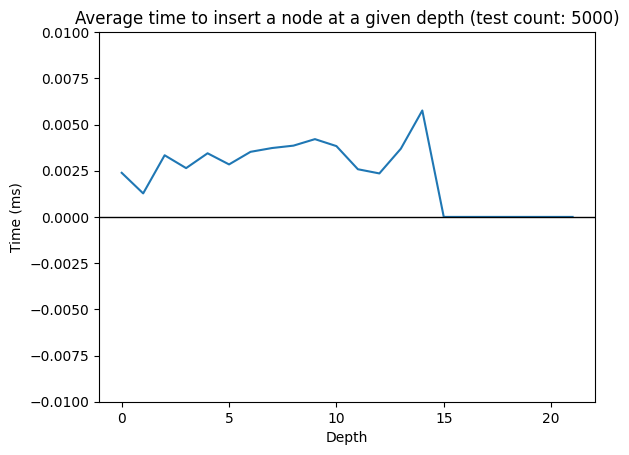

In [46]:
plt.plot(indexes, avgs)
plt.axhline(0, color='black', lw=1)
plt.title(f"Average time to insert a node at a given depth (test count: {test_count})")
plt.xlabel("Depth")
plt.ylim(-0.01, max(0.01, max(avgs)*1.1))
plt.ylabel("Time (ms)")
plt.show()

---